In [1]:
import subprocess
import os
import shutil
import matplotlib.pyplot as plt
import librosa
import numpy as np
from datetime import datetime
import json


def asr(audio_file, lan="", strict=True):
    """语音识别

    Args:
        audio_file (str): 音频文件
        lan (str, optional): 识别语言. Defaults to 'en'.
    """
    file_name = os.path.basename(audio_file)
    file_name_no_ext = os.path.splitext(file_name)[0]
    output_dir = f"whisper_out/{file_name_no_ext}"
    subprocess.run(["mkdir", "-p", output_dir])
    wav_file = f"{output_dir}/{file_name}"
    if audio_file != wav_file:
        shutil.copyfile(audio_file, wav_file)
    cmd = [
        "whisperx",
        os.path.abspath(wav_file),
        "--output_dir",
        os.path.abspath(output_dir),
    ]
    if lan:
        cmd.append("--language")
        cmd.append(lan)
    if (not os.path.exists(f"{output_dir}/{file_name_no_ext}.json")) or strict:
        subprocess.run(cmd)
    return output_dir, file_name_no_ext


def time_to_seconds(time_str):
    time_obj = datetime.strptime(time_str, "%H:%M:%S,%f")
    time_delta = time_obj - datetime.strptime("00:00:00", "%H:%M:%S")
    return time_delta.total_seconds()


def plt_wav_with_words(dir, name, title=""):
    # load waveform
    wav_file = f"{dir}/{name}.wav"
    waveform, sr = librosa.load(wav_file)

    word_segments = json.loads(open(f"{dir}/{name}.json").read())["word_segments"]

    # create a time variable from 0 to len(waveform)/sr
    t = np.arange(len(waveform)) / sr

    # plot waveform with timestamps
    fig, ax = plt.subplots(figsize=(12, 4))

    ax.plot(t, waveform, color="#007acc")  # use plt.plot with time variable t

    # add vertical line at each word's timestamp at the top of the plot

    ylim = ax.get_ylim()
    top = ylim[1]
    bottom = ylim[0]
    new_segs = []
    for seg in word_segments:
        if "start" in seg:
            new_segs.append(seg)
        else:
            new_segs[-1]["word"] += seg["word"]

    for seg in new_segs:
        if "start" in seg:
            ax.plot([seg["start"], seg["start"]], [top, top - 0.05], color="k")
            ax.text(seg["start"] + 0.005, ylim[1] + 0.02 * (top - bottom), seg["word"])

    # manually set the y limit to include the vertical lines
    ax.set_ylim(ylim[0], top)
    plt.title(title, loc="left")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.show()

设置 matplotlib 字体，其中 
使用 DejaVu Sans 恢复默认字体，使用 SimHei 换成中文字体

# 英文demo语音图像生成

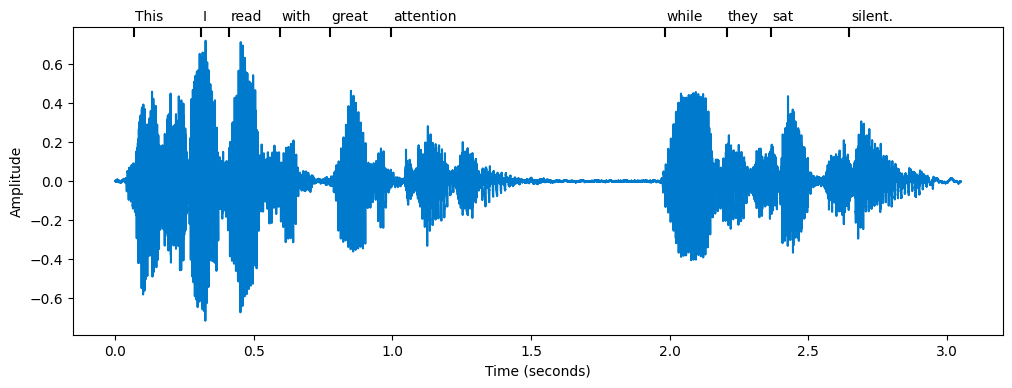

In [18]:
import matplotlib.pyplot as plt
# 恢复默认字体（使用"DejaVu Sans"）
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

audio_file = "whisper_out/8455_210777_000067_000000/8455_210777_000067_000000.wav"
# audio_file = 'whisper_out/anger_libritts1/anger_libritts1.wav'
# audio_file = 'whisper_out/neutral_libritts1/neutral_libritts1.wav'

res = asr(audio_file, strict=False)
plt_wav_with_words(*res)

# 中文demo语音图像生成

/home/ldy/anaconda3/envs/whisperx/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


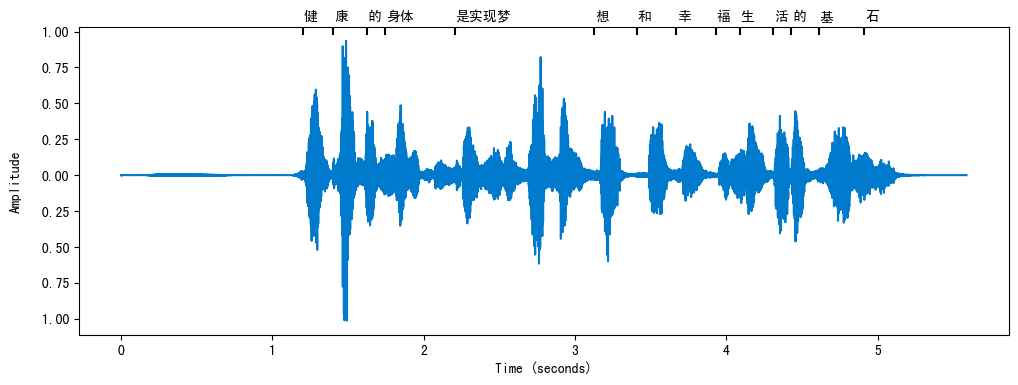

In [19]:
import matplotlib.pyplot as plt
# 恢复默认字体（使用"DejaVu Sans"）
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['SimHei']

audio_file = "audios/aishell2/IT0016W0441.wav"
res = asr(audio_file, strict=False)
plt_wav_with_words(*res)


# 其他代码

In [9]:
import matplotlib
import subprocess
subprocess.run(["code", matplotlib.matplotlib_fname()])

CompletedProcess(args=['code', '/home/ldy/anaconda3/envs/whisperx/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'], returncode=0)

# mel 谱图

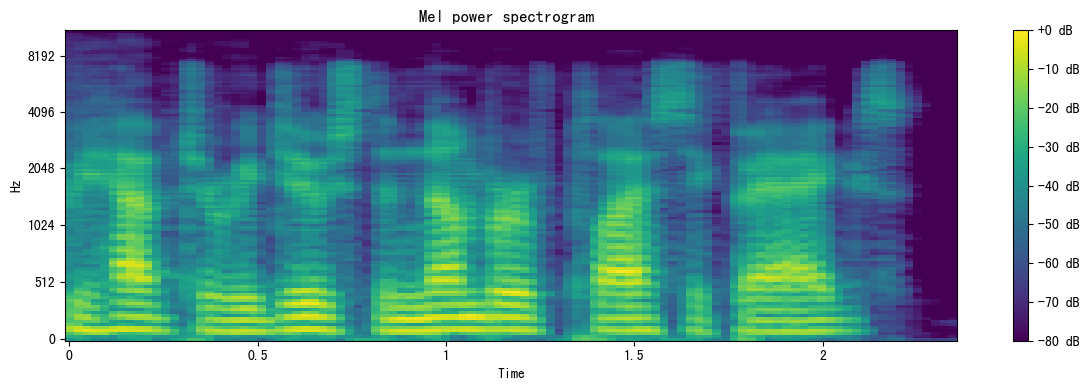

/tmp/ipykernel_18032/3797285258.py:29: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  linear_spec = librosa.amplitude_to_db(librosa.stft(audio), ref=np.max)


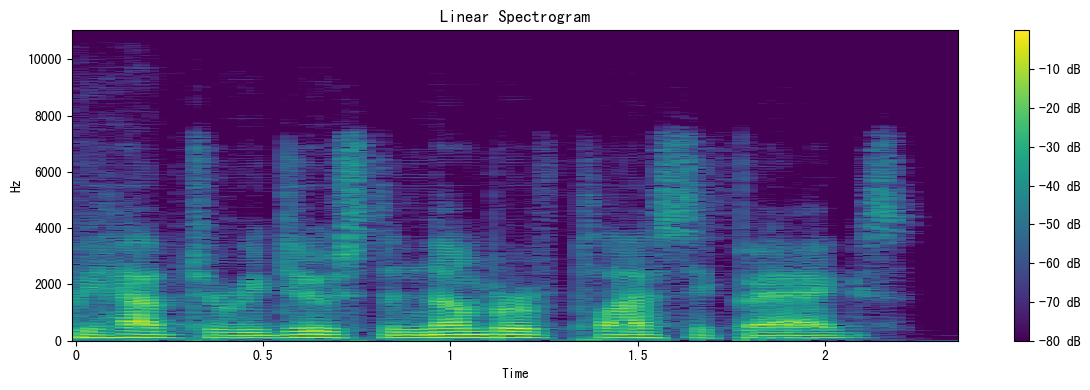

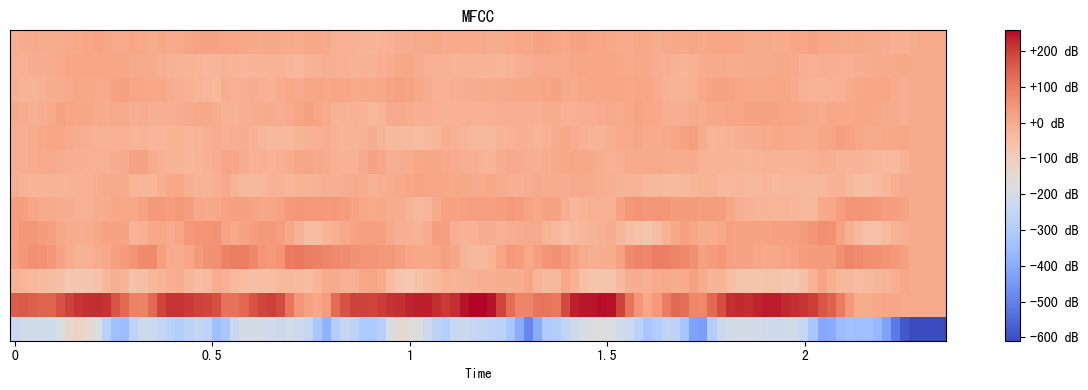

In [44]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def plot_mel_spectrogram(wav_file, title = ''):
    # 加载音频文件
    y, sr = librosa.load(wav_file)

    # 计算Mel频谱
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

    # 转换为对数刻度
    log_S = librosa.power_to_db(S, ref=np.max)

    # 绘制Mel频谱
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
    plt.title(f'Mel power spectrogram {title}')
    plt.colorbar(format='%+02.0f dB')
    plt.tight_layout()
    plt.show()

def plot_linear_spectrogram(wav_file):
    # 加载.wav文件
    audio, sr = librosa.load(wav_file)

    # 提取线性谱
    linear_spec = librosa.amplitude_to_db(librosa.stft(audio), ref=np.max)

    # 绘制线性谱
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(linear_spec, sr=sr, x_axis='time', y_axis='linear',cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Linear Spectrogram')
    plt.tight_layout()
    plt.show()


def plot_mfcc(wav_file):
    # 加载.wav文件
    audio, sr = librosa.load(wav_file)

    # 计算MFCC
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

    # 绘制MFCC
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(mfcc, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('MFCC')
    plt.tight_layout()
    plt.show()
    
# wav_file = 'whisper_out/8455_210777_000067_000000/8455_210777_000067_000000.wav'
# show_mel_spectrogram('audios/emov_db/anger_libritts1.wav','(Anger)')
# show_mel_spectrogram('audios/emov_db/disgust_libritts1.wav','(Disgust)')
# show_mel_spectrogram('audios/emov_db/sleepiness_libritts1.wav','(Sleepy)')
# show_mel_spectrogram('audios/emov_db/amused_libritts1.wav','(Amused)')

plot_mel_spectrogram('audios/emov_db/neutral_libritts1.wav')
plot_linear_spectrogram('audios/emov_db/neutral_libritts1.wav')
plot_mfcc('audios/emov_db/neutral_libritts1.wav')